<h1>PREPARACIÓN Y DELIMITACIÓN DE DATOS

# INEGIpy

In [1]:
from INEGIpy import MarcoGeoestadistico

marco = MarcoGeoestadistico()

In [2]:
bc_municipios = marco.Municipios(entidades='02')
display(bc_municipios)

,geometry,cvegeo,cve_agee,cve_agem,nom_agem,cve_cab,pob,pob_fem,pob_mas,viv,nom_cab
0,"MULTIPOLYGON (((-115.57379 32.65919, -115.5498...",02002,02,002,Mexicali,0001,1049792,520544,529248,330500,NaN
1,"MULTIPOLYGON (((-115.86641 32.26873, -115.8584...",02001,02,001,Ensenada,0001,443807,222500,221307,139968,Asientos
2,"MULTIPOLYGON (((-115.64233 31.12645, -115.6268...",02006,02,006,San Quintín,0001,117568,57790,59778,32773,NaN
3,"MULTIPOLYGON (((-115.11450 31.80936, -115.1066...",02007,02,007,San Felipe,0001,NaN,NaN,NaN,NaN,San Felipe
4,"MULTIPOLYGON (((-117.10047 32.53656, -117.0992...",02004,02,004,Tijuana,0001,1922523,953783,968740,577011,NaN
5,"MULTIPOLYGON (((-117.05342 32.42209, -117.0528...",02005,02,005,Playas de Rosarito,0001,126890,62504,64386,38135,NaN
6,"MULTIPOLYGON (((-116.73856 32.56685, -116.7373...",02003,02,003,Tecate,0001,108440,51310,57130,31176,NaN


Clave Concatenada de Ensenada: 02001


<Axes: >

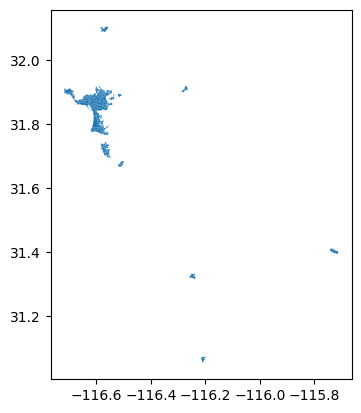

In [3]:
# podemos usar los valores de una tabla para apoyar en la búsqueda de otros valores cuando no se tenga la clave previamente
cve_concatenada = bc_municipios[bc_municipios.nom_agem == 'Ensenada'].cvegeo.iloc[0]
print('Clave Concatenada de Ensenada: {}'.format(cve_concatenada))
ens_agebs = marco.AGEBs(claves_concatenadas=cve_concatenada)
ens_agebs.plot()

In [4]:
bc_localidades = marco.LocalidadesAmanzanadas(entidades = '02', 
                                           municipios = '001')
display(bc_localidades.head(5))

,geometry,cvegeo,cve_agee,cve_agem,cve_loc,nom_loc,ambito,latitud,longitud,altitud,pob,viv,cve_carta,estatus,periodo
0,"MULTIPOLYGON (((-116.59744 31.91723, -116.5969...",020010001,02,001,0001,Ensenada,URBANO,31.8089439,-116.5951339,0018,330652,105810,H11B12,1,2015-06-01
1,"MULTIPOLYGON (((-116.37305 31.28129, -116.3717...",020010095,02,001,0095,Ejido Eréndira,RURAL,31.2733236,-116.3713950,0016,1711,517,H11B32,1,2015-06-01
2,"MULTIPOLYGON (((-116.58290 32.10414, -116.5828...",020010114,02,001,0114,Francisco Zarco (Valle de Guadalupe),URBANO,32.0969847,-116.5795778,0343,4334,1339,I11D82,1,2015-06-01
3,"MULTIPOLYGON (((-116.16108 30.97980, -116.1600...",020010118,02,001,0118,Licenciado Gustavo Díaz Ordaz,RURAL,30.9713356,-116.1544439,0050,1640,473,H11B53,1,2015-06-01
4,"MULTIPOLYGON (((-116.13264 31.93724, -116.1326...",020010121,02,001,0121,La Huerta,RURAL,31.9345175,-116.1327189,0959,110,32,H11B13,1,2015-06-01


Clave Concatenada de Ensenada: 020010001


<Axes: >

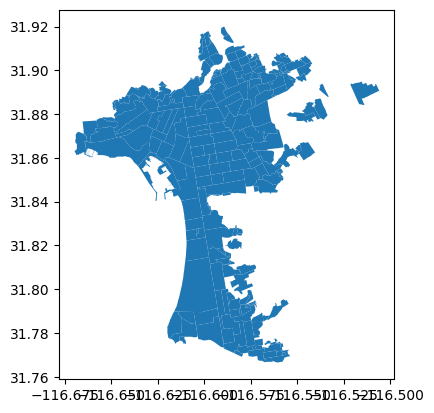

In [5]:
# podemos usar los valores de una tabla para apoyar en la búsqueda de otros valores cuando no se tenga la clave previamente

cve_concatenada = bc_localidades[bc_localidades.nom_loc == 'Ensenada'].cvegeo.iloc[0]
print('Clave Concatenada de Ensenada: {}'.format(cve_concatenada))
ens_agebs = marco.AGEBs(claves_concatenadas=cve_concatenada)
ens_agebs.plot()

In [6]:
ens_agebs.head()

,geometry,cve_agee,nom_agee,cve_agem,nom_agem,cve_loc,cvegeo,pobtot,pobmas,pobfem,tvivhab,cve_ageb
0,"MULTIPOLYGON (((-116.62805 31.86243, -116.6277...",02,Baja California,001,Ensenada,0001,0200100010632,124,108,16,9,0632
1,"MULTIPOLYGON (((-116.59889 31.87070, -116.5999...",02,Baja California,001,Ensenada,0001,0200100010670,1814,897,917,614,0670
2,"MULTIPOLYGON (((-116.57139 31.90713, -116.5712...",02,Baja California,001,Ensenada,0001,0200100011541,33,22,11,14,1541
3,"MULTIPOLYGON (((-116.59283 31.85752, -116.5929...",02,Baja California,001,Ensenada,0001,0200100017875,2048,972,1076,732,7875
4,"MULTIPOLYGON (((-116.55827 31.85301, -116.5587...",02,Baja California,001,Ensenada,0001,0200100011575,169,84,85,52,1575


In [7]:
todas_agebs = ens_agebs['cve_ageb']

# AGEBS crudos de imagenes 
SS's del mapa: https://www.inegi.org.mx/app/mapa/espacioydatos/default.aspx convertidos a texto con google keep

In [8]:
import pandas as pd

In [9]:
#import txt file
file = 'DATA/0_raw_agebs.txt'
data = pd.read_csv(file, sep='\t')

#export to csv
data.to_csv('DATA/0_raw_agebs.csv', index=False)

norens = pd.read_csv('DATA/0_raw_agebs.csv')
norens

#cambiar nombre de columna 
norens = norens.rename(columns={'ENCINOS':'AGEB'})

norens

,AGEB
0,0200100012183
1,0200100010200
2,100011503
3,0200100012075
4,020010001140A
...,...
361,0200100010647
362,9829
363,8727
364,0153


* aproximación de agebs tomando los ultimos 4 digitos (se van a colar caracteres y numeros que no son AGEBs)

In [10]:
#extraer ultimos 4 caracteres de cada fila en imagenes 
norens['AGEB'] = norens['AGEB'].str[-4:]

norens

,AGEB
0,2183
1,0200
2,1503
3,2075
4,140A
...,...
361,0647
362,9829
363,8727
364,0153


* filtramos para solo tener los agebs, comparando con los datos de INEGIpy de AGEBs para todo ensenada

In [11]:
#lista con imagenes['AGEB] que se encuentran tambien en todas_agebs 
norens = norens[norens['AGEB'].isin(todas_agebs)]

#quitamos duplicados
norens = norens.drop_duplicates()

norens

,AGEB
0,2183
2,1503
3,2075
4,140A
5,1537
...,...
358,0524
362,9829
363,8727
364,0153


In [12]:
list_norens = list(norens['AGEB'])

exploramos visualmente

<Axes: >

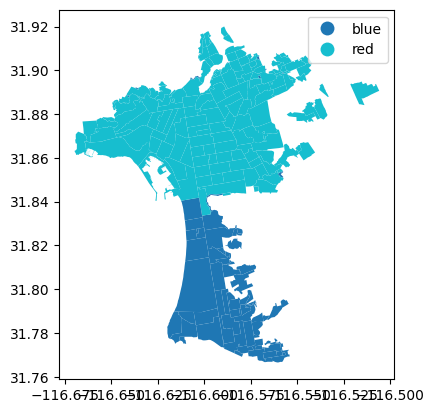

In [13]:
ens_agebs['color'] = 'blue'
ens_agebs.loc[ens_agebs.cve_ageb.isin(list_norens) , 'color'] = 'red'
ens_agebs.plot(column='color', legend=True)

es justo la zona que queremos, y definimos como norte de Ensenada. AGEBs en la lista $list\_norens$

# Generamos CSV a utilizar

Traemos el dataset limpio para los AGEBs de todo ensenada. Proveniente de "3.3_VS_NORENS_CLEAN.ipynb" desde el proyecto de minería, antes de filtrar para la aproximación al norte.

In [14]:
import pandas as pd
import numpy as np

data10 = pd.read_csv("DATA/3_clean10.csv")
data20 = pd.read_csv("DATA/3_clean20.csv")

#describir datos 
print("10:", data10.shape)
print("20:", data20.shape)
print("norens:", norens.shape)


data10.head()

10: (5255, 13)
20: (6007, 13)
norens: (148, 1)


,index,AGEB,MZA,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,4,0435,1,48.0,4.0,8.31,2.50,15.0,1.02,3.43,7.0,16.0,6.0
1,5,0435,3,41.0,6.0,9.48,2.40,16.0,0.85,3.15,4.0,16.0,3.0
2,6,0435,4,41.0,4.0,10.29,1.88,11.0,0.87,4.10,7.0,16.0,3.0
3,7,0435,6,54.0,4.0,10.24,1.82,23.0,0.72,3.18,10.0,17.0,3.0
4,8,0435,7,54.0,7.0,9.85,2.33,17.0,0.78,3.38,7.0,18.0,6.0


* aun se divide por manzana, deberia tener 148 filas despues de agrupar y filtrar para norte

## AGRUPAMOS POR AGEB

In [15]:
#definimos un diccionario para el groupby
agg_dict = {}

#le ponemos suma a todos los que no sean object
for col in data10.columns.tolist():
    if data10[col].dtype == np.dtype('float64'):
        agg_dict[col] = 'sum'
    else:
        agg_dict[col] = 'first'

#les ponemos media a los que correspondan
media = ['GRAPROES', 'PROM_HNV', 'PRO_OCUP_C', 'PROM_OCUP']

for col in media:
    agg_dict[col] = 'mean'

agg_dict


#aplicamos las funciones de arriba
data10_agebs = data10.groupby('AGEB', as_index=False).agg(agg_dict)
data20_agebs = data20.groupby('AGEB', as_index=False).agg(agg_dict)

#delete column MZA
data10_agebs = data10_agebs.drop(['MZA'], axis=1)
data20_agebs = data20_agebs.drop(['MZA'], axis=1)

#delete agebs that are in sv20 but not in sv10
data20_agebs = data20_agebs[data20_agebs['AGEB'].isin(data10_agebs['AGEB'])]

print (data20_agebs['AGEB'].count() == data10_agebs['AGEB'].count())

True


In [16]:
#describir datos 
print("10:", data10.shape)
print("20:", data20.shape)

print("\nesperado 10:", data10['AGEB'].nunique())
print("esperado 20:", data20['AGEB'].nunique()) #sale mas porque aun no los hicimos coincidir en agebs


print("\n10 grpd:", data10_agebs.shape)
print("20 grpd:", data20_agebs.shape)

print("\nnorens:", norens.shape)

10: (5255, 13)
20: (6007, 13)

esperado 10: 190
esperado 20: 220

10 grpd: (190, 12)
20 grpd: (190, 12)

norens: (148, 1)


### Exportamos los datos para todo ensenada ya agrupados por AGEB

In [17]:
data10_agebs.to_csv('DATA/FULL_ENS_AGEBS_10.csv', index=False)
data20_agebs.to_csv('DATA/FULL_ENS_AGEBS_20.csv', index=False)

* ya se agrupó todo ensenada por AGEB, ahora vamos a limitarnos al norte

### FILTRAMOS PARA NORTE

usaremos: <br> <br>
$norens$ <br>
$list\_norens = list(norens['AGEB'])$

In [18]:
#lista con data10_agebs['AGEB] que se encuentran tambien en norens 
NORENS_AGEBS_10 = data10_agebs[data10_agebs['AGEB'].isin(norens['AGEB'])]
NORENS_AGEBS_20 = data20_agebs[data20_agebs['AGEB'].isin(norens['AGEB'])]

In [19]:
#describir datos 
print("NORENS_AGEBS_10:", NORENS_AGEBS_10.shape)
print("NORENS_AGEBS_20:", NORENS_AGEBS_20.shape)

print("\nnorens:", norens.shape)

NORENS_AGEBS_10: (128, 12)
NORENS_AGEBS_20: (128, 12)

norens: (148, 1)


* salen menos, al parecer faltan AGEBs en nuestro dataset proveniente de minería 

<Axes: >

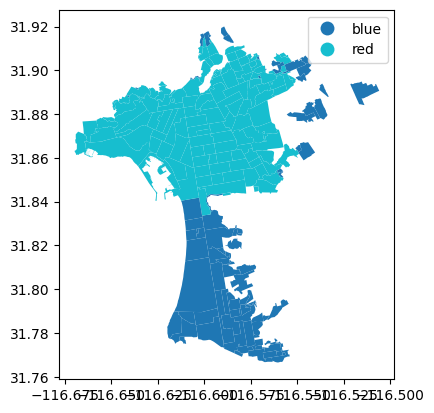

In [20]:
list_norens = list(NORENS_AGEBS_10['AGEB'])

ens_agebs['color'] = 'blue'
ens_agebs.loc[ens_agebs.cve_ageb.isin(list_norens) , 'color'] = 'red'
ens_agebs.plot(column='color', legend=True)

# EXPORTAMOS CSV DE NORENS_AGEBS (ya agrupados)

In [21]:
#exportar a csv
NORENS_AGEBS_10.to_csv('DATA/FULL_NORENS_AGEBS_10.csv', index=False)
NORENS_AGEBS_20.to_csv('DATA/FULL_NORENS_AGEBS_20.csv', index=False)

In [22]:
NORENS_AGEBS_20.head()

,index,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
15,442,0435,3798.0,457.0,10.768983,1.982203,1382.0,0.776610,3.137627,782.0,1273.0,259.0
16,502,044A,1429.0,257.0,10.522963,2.074815,573.0,0.625926,2.646667,330.0,471.0,83.0
17,530,0454,2339.0,296.0,12.051698,1.611509,883.0,0.608302,2.844151,531.0,718.0,118.0
18,584,0488,2214.0,251.0,9.373571,2.255714,750.0,0.893214,3.311786,309.0,728.0,233.0
19,613,0492,956.0,131.0,12.295000,1.264722,454.0,0.584722,2.386944,360.0,368.0,33.0


* describe

In [23]:
NORENS_AGEBS_10

,index,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
0,4,0435,3632.0,325.0,9.617302,2.193333,1321.0,0.853016,3.352540,584.0,1241.0,419.0
1,68,044A,1539.0,224.0,9.569643,2.264286,549.0,0.750714,3.152143,254.0,478.0,135.0
2,97,0454,2211.0,188.0,10.994717,1.929057,742.0,0.661887,3.145849,438.0,760.0,118.0
3,151,0488,2045.0,140.0,8.206786,2.405357,635.0,1.056071,3.796071,189.0,743.0,290.0
4,180,0492,557.0,15.0,7.670000,0.912826,281.0,0.372609,1.648261,189.0,271.0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...
181,5320,9829,69.0,0.0,5.303333,1.206667,21.0,0.750000,2.366667,0.0,28.0,0.0
183,5337,9848,1554.0,13.0,9.500000,1.678889,658.0,0.947778,3.392222,179.0,665.0,239.0
184,5356,9852,998.0,3.0,11.296842,1.479474,394.0,0.874737,2.987895,205.0,350.0,166.0
185,5376,9867,796.0,9.0,10.288824,1.610588,287.0,1.045882,3.331176,116.0,275.0,207.0


In [24]:
NORENS_AGEBS_20

,index,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
15,442,0435,3798.0,457.0,10.768983,1.982203,1382.0,0.776610,3.137627,782.0,1273.0,259.0
16,502,044A,1429.0,257.0,10.522963,2.074815,573.0,0.625926,2.646667,330.0,471.0,83.0
17,530,0454,2339.0,296.0,12.051698,1.611509,883.0,0.608302,2.844151,531.0,718.0,118.0
18,584,0488,2214.0,251.0,9.373571,2.255714,750.0,0.893214,3.311786,309.0,728.0,233.0
19,613,0492,956.0,131.0,12.295000,1.264722,454.0,0.584722,2.386944,360.0,368.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...
211,6094,9829,69.0,9.0,8.542857,2.867143,21.0,1.031429,3.530000,35.0,74.0,20.0
213,6116,9848,2498.0,50.0,10.189412,1.698824,768.0,0.967059,3.446471,344.0,1002.0,331.0
214,6134,9852,1089.0,38.0,11.532632,1.442105,387.0,0.863158,3.028947,224.0,256.0,147.0
215,6154,9867,922.0,18.0,11.001765,1.514706,291.0,0.939412,3.389412,131.0,253.0,84.0


In [33]:
NORENS_AGEBS_20.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128 entries, 15 to 216
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       128 non-null    int64  
 1   AGEB        128 non-null    object 
 2   P_TOTAL     128 non-null    float64
 3   POB65_MAS   128 non-null    float64
 4   GRAPROES    128 non-null    float64
 5   PROM_HNV    128 non-null    float64
 6   VIVTOT      128 non-null    float64
 7   PRO_OCUP_C  128 non-null    float64
 8   PROM_OCUP   128 non-null    float64
 9   VPH_PC      128 non-null    float64
 10  OTRAENT     128 non-null    float64
 11  P_0A5       128 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 13.0+ KB


In [25]:
import dataframe_image as dfi

In [26]:
#show describe only mean, min, max for each column except index
tabla20 = NORENS_AGEBS_20.describe().loc[['mean', 'min', 'max']].drop(['index'], axis=1)
dfi.export(tabla20, 'tabla20.png')
tabla20

,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
mean,1686.210938,185.78125,9.982773,1.740443,613.90625,0.789928,2.859247,324.476562,597.460938,156.414062
min,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4685.000000,560.00000,14.709231,2.988000,1719.00000,1.662000,4.422000,875.000000,1736.000000,543.000000


In [27]:
#show describe only mean, min, max for each column except index
tabla10 = NORENS_AGEBS_10.describe().loc[['mean', 'min', 'max']].drop(['index'], axis=1)
dfi.export(tabla10, 'tabla10.png')
tabla10

,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
mean,1586.734375,116.585938,8.605171,1.842555,562.234375,0.854362,2.967536,241.445312,598.132812,178.625
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
max,5443.000000,375.000000,14.026154,2.910000,1581.000000,2.350000,4.605000,673.000000,1987.000000,557.000


* hay un ageb que tiene 1 habitante y luego 0: 

<Axes: >

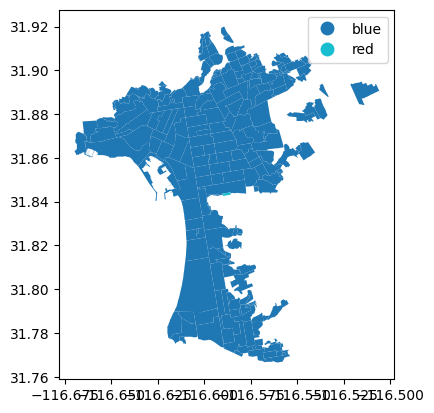

In [28]:
#highlight agebs with p_total == 0
list_norens_0 = list(NORENS_AGEBS_10[NORENS_AGEBS_10['P_TOTAL']==1]['AGEB'])

ens_agebs['color'] = 'blue'
ens_agebs.loc[ens_agebs.cve_ageb.isin(list_norens_0) , 'color'] = 'red'
ens_agebs.plot(column='color', legend=True)



In [29]:
#rangos de valores para cada variable 
print("============ 2010 ============")
for col in NORENS_AGEBS_10.columns.tolist():
    print(col)
    print(NORENS_AGEBS_10[col].min(), NORENS_AGEBS_10[col].max())
    print()

print("============ 2020 ============")
#rangos de valores para cada variable
for col in NORENS_AGEBS_20.columns.tolist():
    print(col)
    print(NORENS_AGEBS_20[col].min(), NORENS_AGEBS_20[col].max())
    print()

#generar tabla de rangos 
rangos = pd.DataFrame()
for col in NORENS_AGEBS_10.columns.tolist():
    rangos[col] = [NORENS_AGEBS_10[col].min(), NORENS_AGEBS_10[col].max(), NORENS_AGEBS_20[col].min(), NORENS_AGEBS_20[col].max()]

rangos.index = ['min_10', 'max_10', 'min_20', 'max_20']
rangos



============ 2010 ============
index
4 5394

AGEB
0435 9871

P_TOTAL
0.0 5443.0

POB65_MAS
0.0 375.0

GRAPROES
0.0 14.026153846153846

PROM_HNV
0.0 2.91

VIVTOT
0.0 1581.0

PRO_OCUP_C
0.0 2.35

PROM_OCUP
0.0 4.605

VPH_PC
0.0 673.0

OTRAENT
0.0 1987.0

P_0A5
0.0 557.0

============ 2020 ============
index
442 6172

AGEB
0435 9871

P_TOTAL
0.0 4685.0

POB65_MAS
0.0 560.0

GRAPROES
0.0 14.70923076923077

PROM_HNV
0.0 2.988

VIVTOT
0.0 1719.0

PRO_OCUP_C
0.0 1.6620000000000001

PROM_OCUP
0.0 4.422

VPH_PC
0.0 875.0

OTRAENT
0.0 1736.0

P_0A5
0.0 543.0



,index,AGEB,P_TOTAL,POB65_MAS,GRAPROES,PROM_HNV,VIVTOT,PRO_OCUP_C,PROM_OCUP,VPH_PC,OTRAENT,P_0A5
min_10,4,0435,0.0,0.0,0.000000,0.000,0.0,0.000,0.000,0.0,0.0,0.0
max_10,5394,9871,5443.0,375.0,14.026154,2.910,1581.0,2.350,4.605,673.0,1987.0,557.0
min_20,442,0435,0.0,0.0,0.000000,0.000,0.0,0.000,0.000,0.0,0.0,0.0
max_20,6172,9871,4685.0,560.0,14.709231,2.988,1719.0,1.662,4.422,875.0,1736.0,543.0


In [30]:
import dataframe_image as dfi
dfi.export(rangos, 'df_styled.png')

In [31]:
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import pandas as pd

In [32]:
from PIL import Image, ImageDraw, ImageFont
import pandas as pd
import numpy as np

# Crear el dataframe de rangos
rangos = pd.DataFrame()
for col in NORENS_AGEBS_10.columns.tolist():
    rangos[col] = [NORENS_AGEBS_10[col].min(), NORENS_AGEBS_10[col].max(), NORENS_AGEBS_20[col].min(), NORENS_AGEBS_20[col].max()]

rangos.index = ['min_10', 'max_10', 'min_20', 'max_20']

# Convertir el dataframe a string
cuadro = rangos.to_string(index=True, justify='center', col_space=12)

# Crear la imagen
img = Image.new('RGB', (800, 600), color = '#000080')
draw = ImageDraw.Draw(img)
font = ImageFont.truetype("LiberationMono-Regular.ttf", 30)
draw.multiline_text((50, 40), cuadro, (255,255,255), font=font, align='center')

# Guardar la imagen
img.save('rangos.png')